In [1]:
# 載入相關套件

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns
import matplotlib
from scipy import stats
import numpy as np


In [14]:
%matplotlib inline

In [9]:
# 1. 載入數據集
data_path = 'train_dataset.csv'
df = pd.read_csv(data_path)

# 顯示前10行數據
print(df.head(10))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PIRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.17004  12.5   7.87     0  0.524  6.004  85.9  6.5921    5  311     15.2   
5  0.22489  12.5   7.87     0  0.524  6.377  94.3  6.3467    5  311     15.2   
6  0.11747  12.5   7.87     0  0.524  6.009  82.9  6.2267    5  311     15.2   
7  0.09378  12.5   7.87     0  0.524  5.889  39.0  5.4509    5  311     15.2   
8  0.62976   0.0   8.14     0  0.538  5.949  61.8  4.7075    4  307     21.0   
9  0.63796   0.0   8.14     0  0.538  6.096  84.5  4.4619    4  307     21.0   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.9

In [10]:
# 2. 數據描述統計量
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  455.000000  455.000000  455.000000  455.000000  455.000000  455.000000   
mean     3.989784   10.912088   11.664110    0.072527    0.561758    6.263266   
std      8.993398   23.130233    6.974787    0.259645    0.118627    0.704493   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.084170    0.000000    5.190000    0.000000    0.453000    5.877500   
50%      0.289600    0.000000   10.010000    0.000000    0.538000    6.193000   
75%      4.548895    0.000000   18.100000    0.000000    0.647000    6.611000   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PIRATIO           B  \
count  455.000000  455.000000  455.000000  455.000000  455.000000  455.000000   
mean    70.344835    3.664227   10.092308  420.778022   18.519780  353.272593   
std     27.697196    2.1181

In [4]:
# 資料清理：移除異常值
# Function to remove outliers
def remove_outliers(data):
    return data[(data - data.mean()).abs() < 3 * data.std()]

# Clean all features by removing outliers
df_cleaned = df.copy()
for column in df.columns:
    df_cleaned[column] = remove_outliers(df_cleaned[column])


In [11]:

# 3. 資料處理(移除離群值)
def remove_outliers(df, column):
    # 計算四分位數
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # 四分位距
    
    # 定義範圍
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 移除離群值
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 移除 'PRICE' 列的離群值
df_cleaned = remove_outliers(df, 'PRICE')
print(df_cleaned.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  424.000000  424.000000  424.000000  424.000000  424.000000  424.000000   
mean     4.171001   10.166274   11.895212    0.061321    0.564365    6.165179   
std      9.266088   21.923466    6.895632    0.240201    0.119935    0.587520   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.087962    0.000000    5.640000    0.000000    0.453000    5.870750   
50%      0.281745    0.000000   10.590000    0.000000    0.538000    6.152500   
75%      4.689715    0.000000   18.100000    0.000000    0.655000    6.491250   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PIRATIO           B  \
count  424.000000  424.000000  424.000000  424.000000  424.000000  424.000000   
mean    70.465802    3.687517   10.264151  426.186321   18.672406  350.969788   
std     27.507692    2.1329

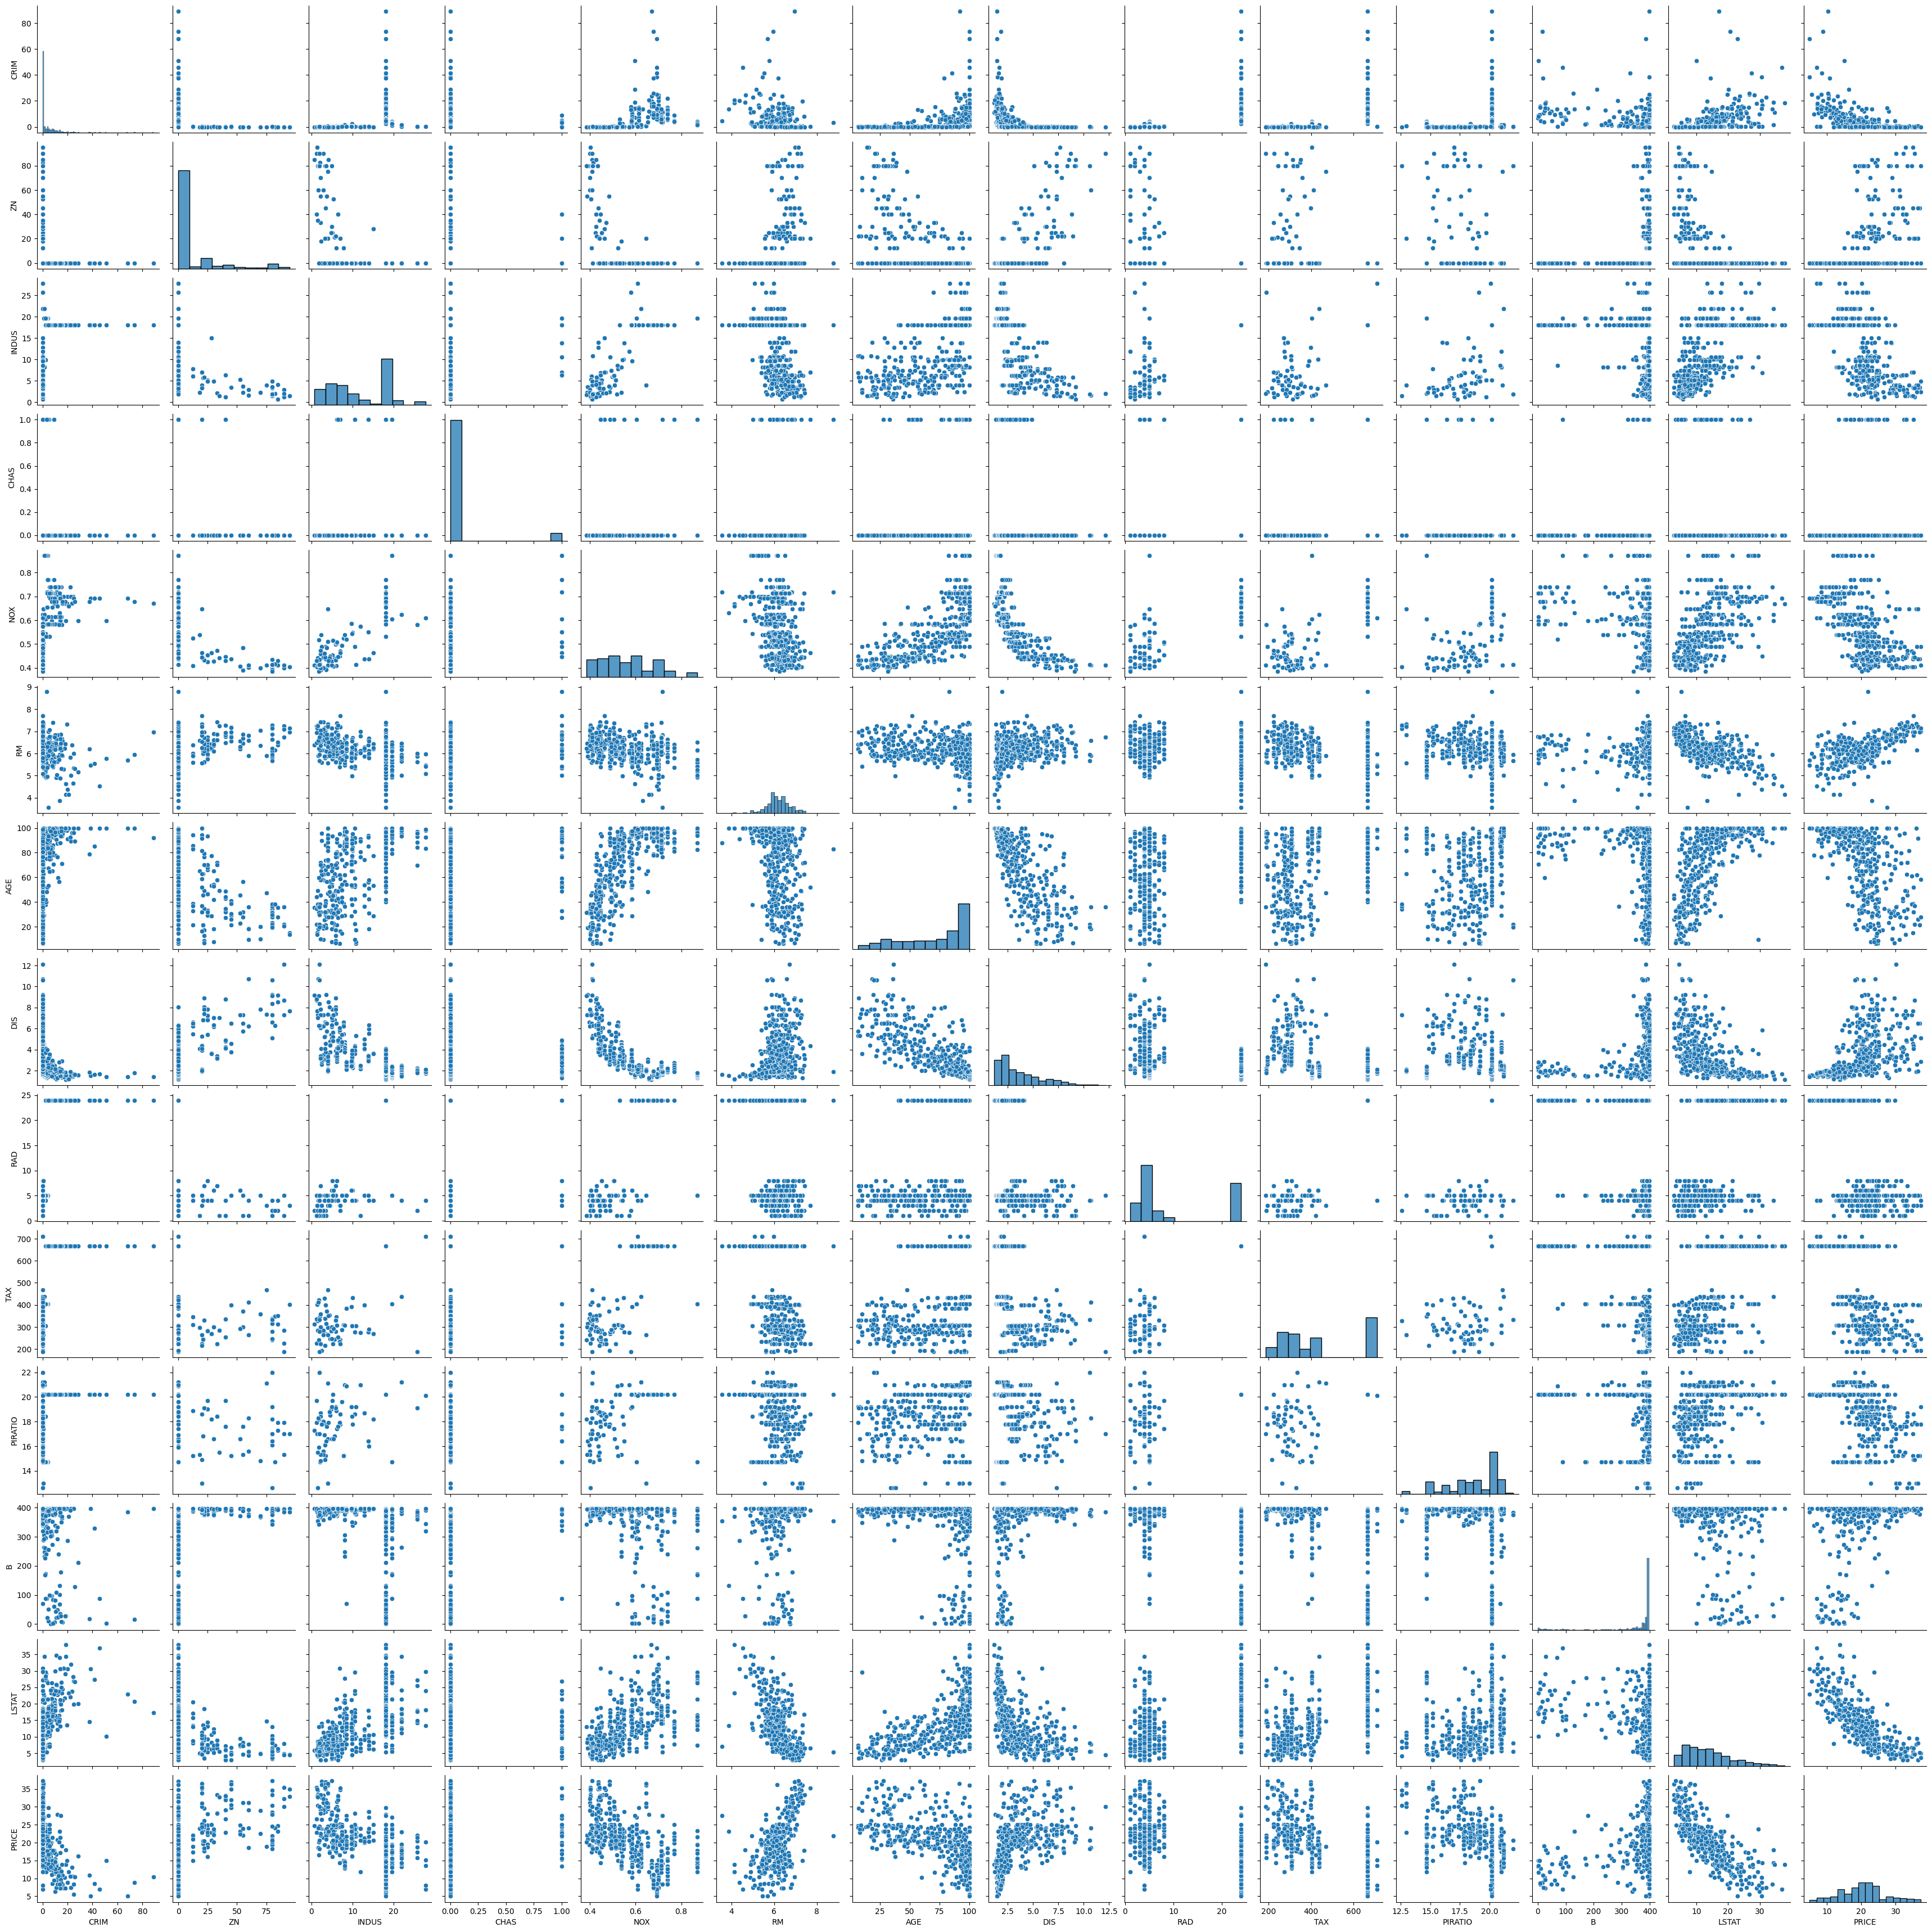

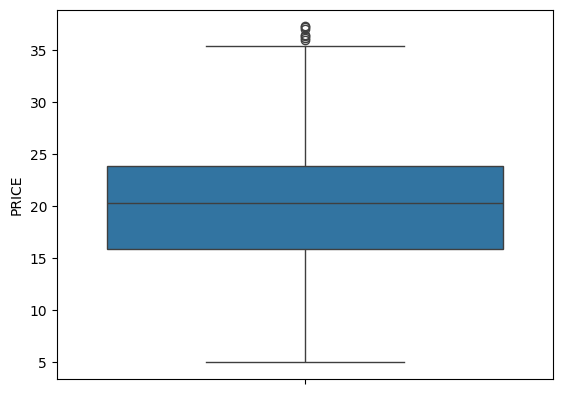

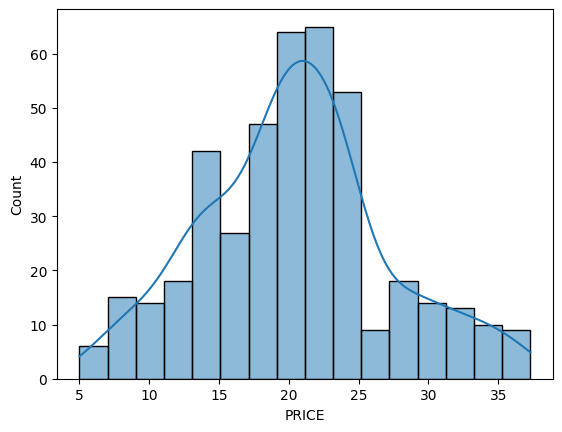

In [16]:
# 4. 數據可視化
# 繪製多個特徵之間的散點圖
sns.pairplot(df_cleaned)
plt.show()

# 繪製目標變量 'PRICE' 的箱線圖，包含離群值
sns.boxplot(y=df_cleaned['PRICE'])
plt.show()

# 繪製目標變量 'PRICE' 的正態分佈圖
sns.histplot(df_cleaned['PRICE'], kde=True)
plt.show()



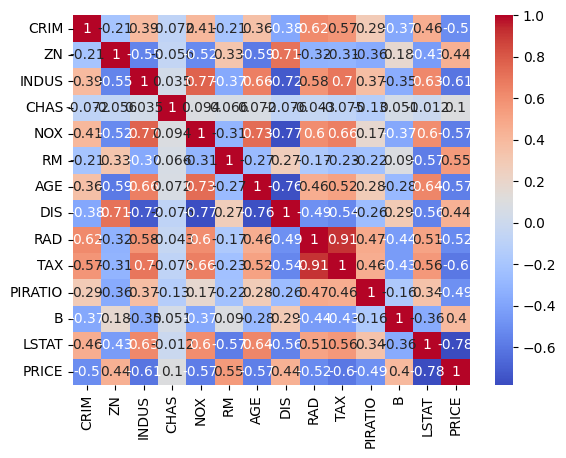

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT', 'PRICE']


In [17]:
# 5.相關性分析和特徵選擇
# 計算相關係數矩陣
correlation_matrix = df_cleaned.corr()

# 繪製相關係數熱圖
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 選擇與 'PRICE' 相關度較高的特徵
selected_features = correlation_matrix[correlation_matrix['PRICE'].abs() > 0.5].index.tolist()
print(selected_features)


In [18]:
# 6. 資料拆分
from sklearn.model_selection import train_test_split

X = df_cleaned[selected_features].drop(columns=['PRICE'])
y = df_cleaned['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 7. 模型訓練與評估
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 線性回歸模型
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = r2_score(y_test, lr_predictions)
print(f'線性回歸 準確率: {lr_accuracy}')


線性回歸 準確率: 0.5734119879334942


In [20]:
# K-Nearest Neighbors 模型
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = r2_score(y_test, knn_predictions)
print(f'KNN 準確率: {knn_accuracy}')

# GridSearchCV 來調整 KNN 參數
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
best_knn_predictions = best_knn.predict(X_test)
best_knn_accuracy = r2_score(y_test, best_knn_predictions)
print(f'最佳 KNN 準確率: {best_knn_accuracy}')

KNN 準確率: 0.4032011489754923
最佳 KNN 準確率: 0.406472360323172


In [32]:
# 決策樹回歸
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_accuracy = r2_score(y_test, tree_predictions)
print(f'決策樹回歸 準確率: {tree_accuracy}')

決策樹回歸 準確率: 0.56221635116419


In [31]:
# 隨機森林回歸
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = r2_score(y_test, rf_predictions)
print(f'隨機森林 準確率: {rf_accuracy}')

隨機森林 準確率: 0.7477733080405362


In [35]:
# 8.模型評估
# 計算均方誤差和R^2
mse_lr = mean_squared_error(y_test, lr_predictions)
mse_knn = mean_squared_error(y_test, knn_predictions)
mse_best_knn = mean_squared_error(y_test, best_knn_predictions)
mse_tree = mean_squared_error(y_test, tree_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)

print(f'線性回歸 均方誤差: {mse_lr}, R^2: {lr_accuracy}')
print(f'KNN 均方誤差: {mse_knn}, R^2: {knn_accuracy}')
print(f'最佳 KNN 均方誤差: {mse_best_knn}, R^2: {best_knn_accuracy}')
print(f'決策樹回歸 均方誤差: {mse_tree}, R^2: {tree_accuracy}')
print(f'隨機森林 均方誤差: {mse_rf}, R^2: {rf_accuracy}')


線性回歸 均方誤差: 11.180340996785123, R^2: 0.5734119879334942
KNN 均方誤差: 15.641355294117645, R^2: 0.4032011489754923
最佳 KNN 均方誤差: 15.555620915032678, R^2: 0.406472360323172
決策樹回歸 均方誤差: 11.473764705882356, R^2: 0.56221635116419
隨機森林 均方誤差: 6.6105477529411845, R^2: 0.7477733080405362


In [36]:
# 計算20%容忍範圍內的正確比率
def within_tolerance(y_true, y_pred, tolerance=0.2):
    return np.mean(np.abs((y_true - y_pred) / y_true) < tolerance)

lr_tolerance = within_tolerance(y_test, lr_predictions)
tree_tolerance = within_tolerance(y_test, tree_predictions)
rf_tolerance = within_tolerance(y_test, rf_predictions)

print(f'線性回歸 20%容忍範圍內的正確比率: {lr_tolerance}')
print(f'決策樹回歸 20%容忍範圍內的正確比率: {tree_tolerance}')
print(f'隨機森林 20%容忍範圍內的正確比率: {rf_tolerance}')

線性回歸 20%容忍範圍內的正確比率: 0.6941176470588235
決策樹回歸 20%容忍範圍內的正確比率: 0.7294117647058823
隨機森林 20%容忍範圍內的正確比率: 0.8823529411764706
